# Planetary Motion Mathematical Programming Project  
#### By Billy, Blessen, John and Kawsar

## Introduction

This project features many animations which can cause the kernal to bug. Thus it is best to go through each cell individually one after the other rather than trying to run them all at once. After you are finished with an animation, please stop it. 

Please also note that there are saved videos of all animations below, ordered as they appear, in the Animations folder. There are also saved diagrams of all diagrams that appear below, ordered as they appear, in the Diagrams folder.

### Constants

In [21]:
G = 6.67408 * (10**-11)
earMass = 5.9722 * (10**24)
sunMass = 1.989 * (10**30)
moonMass = 7.348 * (10**22)
orbitDistance = 149.59787 * (10**9)

### Utility Functions

In [27]:
%matplotlib notebook
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib import animation
import matplotlib
import scipy.constants
from numpy import unravel_index
from math import sqrt

numberOfIterations = 3600 

# initialization function: plot the background of each frame
def initWithText():
    point.set_data([], [])
    
    accText1.set_text('a1')
    accText2.set_text('a2')

    vText1.set_text('v1')
    vText2.set_text('v2')
    
    return point, accText1

# initialization function: plot the background of each frame
def init():
    
    point.set_data([], [])
    
    return point,

# returns the gravitational force between the sun and the earth, as a vector
def force(rVect):
    
    rVect=np.array(rVect)
    negativeArray = np.array((-1,-1))
    
    f= -rVect*earMass*sunMass*G/(np.linalg.norm(rVect)**3)
    
    return f

def twoBodyForce(rVect, m1,m2): #generalised force function for two bodies
    rVect = np.array(rVect)
    f = -rVect * m1 * m2 * G / (np.linalg.norm(rVect) ** 3)

    return f

#calculates the trajectories and velocities of a planet moving around a fixed mass.
def orbit(r0,v0):
    dt = 3.1536e7/3600 # using a timestamp of roughly 2.5 hours 
    
    #initilising variables and storing initial conditions
    rVect = np.zeros(((numberOfIterations + 1),2))
    aVect=np.zeros(((numberOfIterations + 1),2))
    vVect = np.zeros(((numberOfIterations + 1),2))
    
    rVect[0]=r0
    vVect[0]=v0
    
    #uses the velocity Verlet algorithm to compute positions,acceleration and velocities
    for i in range (numberOfIterations):
        rVect[i+1] = (rVect[i]) + (vVect[i]*dt)+(0.5*aVect[i]*(dt**2))                   
        aVect[i+1]=force(rVect[i+1])/earMass
        vVect[i+1] = (vVect[i]) + (0.5*(aVect[i+1]+aVect[i])*dt)
    #returning the path and velocities
    return (rVect, vVect)

# animation function.  This is called sequentially
def animate(i):
    if i >= numberOfIterations: #restarts animation from 0 if i > numberOfIterations
        loops = math.floor(i/numberOfIterations)
        i = i -(numberOfIterations*loops)
    
    x = points[i+1][0]
    y = points[i+1][1]
    point.set_data([x], [y])
    
    return point,

#general animation function, allows more than one body to be animated at once.
def animateMultiple(i):
    
    if i >= numberOfIterations: #restarts animation from 0 if i > numberOfIterations
        loops = math.floor(i/numberOfIterations)
        i = i -(numberOfIterations*loops)
    
    #iterate through bodies to be animated
    for key in pointsDictionary:
        
        #set co-ords
        x = pointsDictionary[key][i+1][0]
        y = pointsDictionary[key][i+1][1]
        
        animatingPointsDictionary[key].set_data([x], [y])
        
    return list(pointsDictionary.values())


def animateBarry(i):
    
    if i >= numberOfIterations: #restarts animation from 0 if i > numberOfIterations
        loops = math.floor(i/numberOfIterations)
        i = i -(numberOfIterations*loops)
    
    x = sunOrbitRelativeToBarry[i+1][0]
    y = sunOrbitRelativeToBarry[i+1][1]
    point.set_data([x], [y])
    
    return point,

def animateMultipleBodies(i):
    
    if i >= numberOfIterations: #restarts animation from 0 if i > numberOfIterations
        loops = math.floor(i/numberOfIterations)
        i = i -(numberOfIterations*loops)
    
    for key in pointsDictionary:
        
        for body in animatingPointsDictionary[key]:
            x = pointsDictionary[key][body][i+1][0]
            y = pointsDictionary[key][body][i+1][1]
            
            animatingPointsDictionary[key][body].set_data([x], [y])
        
    return animatingPointsDictionary[key]

#same as general animation function but allows text to be animated too
def animateMultipleWithText(i):
    
    if i >= numberOfIterations: #restarts animation from 0 if i > numberOfIterations
        loops = math.floor(i/numberOfIterations)
        i = i -(numberOfIterations*loops)
    
    for key in pointsDictionary:
        
        #if iterating over text object, handle accordingly
        if key in ['accBodyOne', 'vB1', 'accBodyTwo', 'vB2']:

            x = pointsDictionary[key][i+1][0]
            y = pointsDictionary[key][i+1][1]
            
            #format to 3sf
            formattedX = np.format_float_scientific(x, precision=1, unique=False, trim='k')
            formattedY = np.format_float_scientific(y, precision=1, unique=False, trim='k')
            
            #set text
            animatingPointsDictionary[key].set_text(key[0]+ ' = ('+str(formattedX)+', '+str(formattedY)+')')
        
        else:
            x = pointsDictionary[key][i+1][0]
            y = pointsDictionary[key][i+1][1]
        
            animatingPointsDictionary[key].set_data([x], [y])
        
    return list(pointsDictionary.values())

## Core 1

In this section we perform a simple simulation of an Earth like planet's orbit around the Sun. We use initial positions of $r_0=(149.59787\times 10^9 m ,0)$ for the Earth like planet and $r_0=(0 ,0)$ for the Sun. We use an initial velocity of $v_0 = (0,29.8km \backslash s)$ for the Earth like planet and treat the Sun as fixed. We run the simulation using the velocity Verlet algorithm $k = 3600$ times with a $dt$ of roughly $2.5h$, equivilant to the number of seconds in a year divided by $3600$. This means that the simulation runs over the course of a year.  

<IPython.core.display.Javascript object>


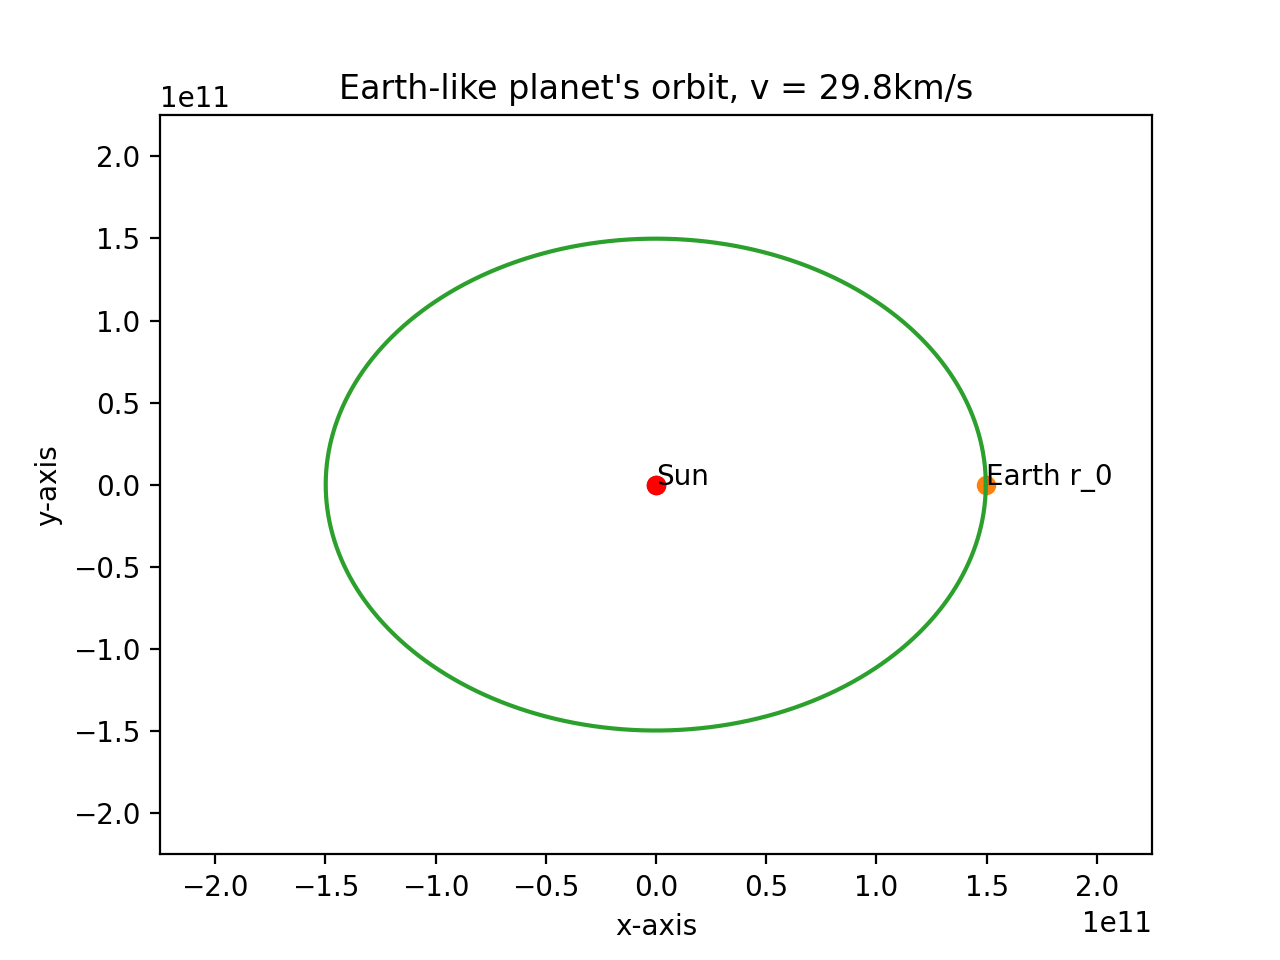

<IPython.core.display.Javascript object>

In [28]:
#set simulation time to 1 year
numberOfIterations = 3600
#get our array of earth points accordingly
points = orbit((orbitDistance,0),(0,29800))[0]

#set axes accordingly
fig = plt.figure()
ax = plt.axes(xlim=(-225e9, 225e9), ylim=(-225e9, 225e9))

#plot our inital points
point, = ax.plot(0,0, marker="o")
plt.plot([0,0],'ro')
plt.annotate("Sun",(0,0))

#formating...
plt.title("Earth-like planet's orbit, v = 29.8km/s")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.plot(orbitDistance,0, 'o')
plt.annotate("Earth r_0", [orbitDistance, 0], ha='left')

#plot the earth like planet's trajectory
plt.plot(points[:,0], points[:,1])

plt.show()

#animation figure
fig = plt.figure()
ax = plt.axes(xlim=(-225e9, 225e9), ylim=(-225e9, 225e9))

point, = ax.plot(0,0, marker="o")
plt.plot([0,0],'ro')
plt.annotate("Sun",(0,0))
plt.title("Earth-like planet's orbit animation, v = 29.8km/s")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.plot(orbitDistance,0, 'o')
plt.annotate("Earth r_0", [orbitDistance, 0], ha='left')

#call our animation function
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               interval=1, blit=True, frames=3600, save_count=300)

plt.plot(points[:,0], points[:,1])

plt.show()

## Core 2

In this part we will be verifying that the Earth like planet's orbit is closed with initial position $r_0=(149.59787\times 10^9 m ,0)$ and initial velocity $v_0 = (0,29.8km \backslash s)$
This can be done finding the trajectory using the "orbit" function that we have defined before and plotting it. The trajectory represents the orbit of an Earth like planet over the course of a year.

<IPython.core.display.Javascript object>


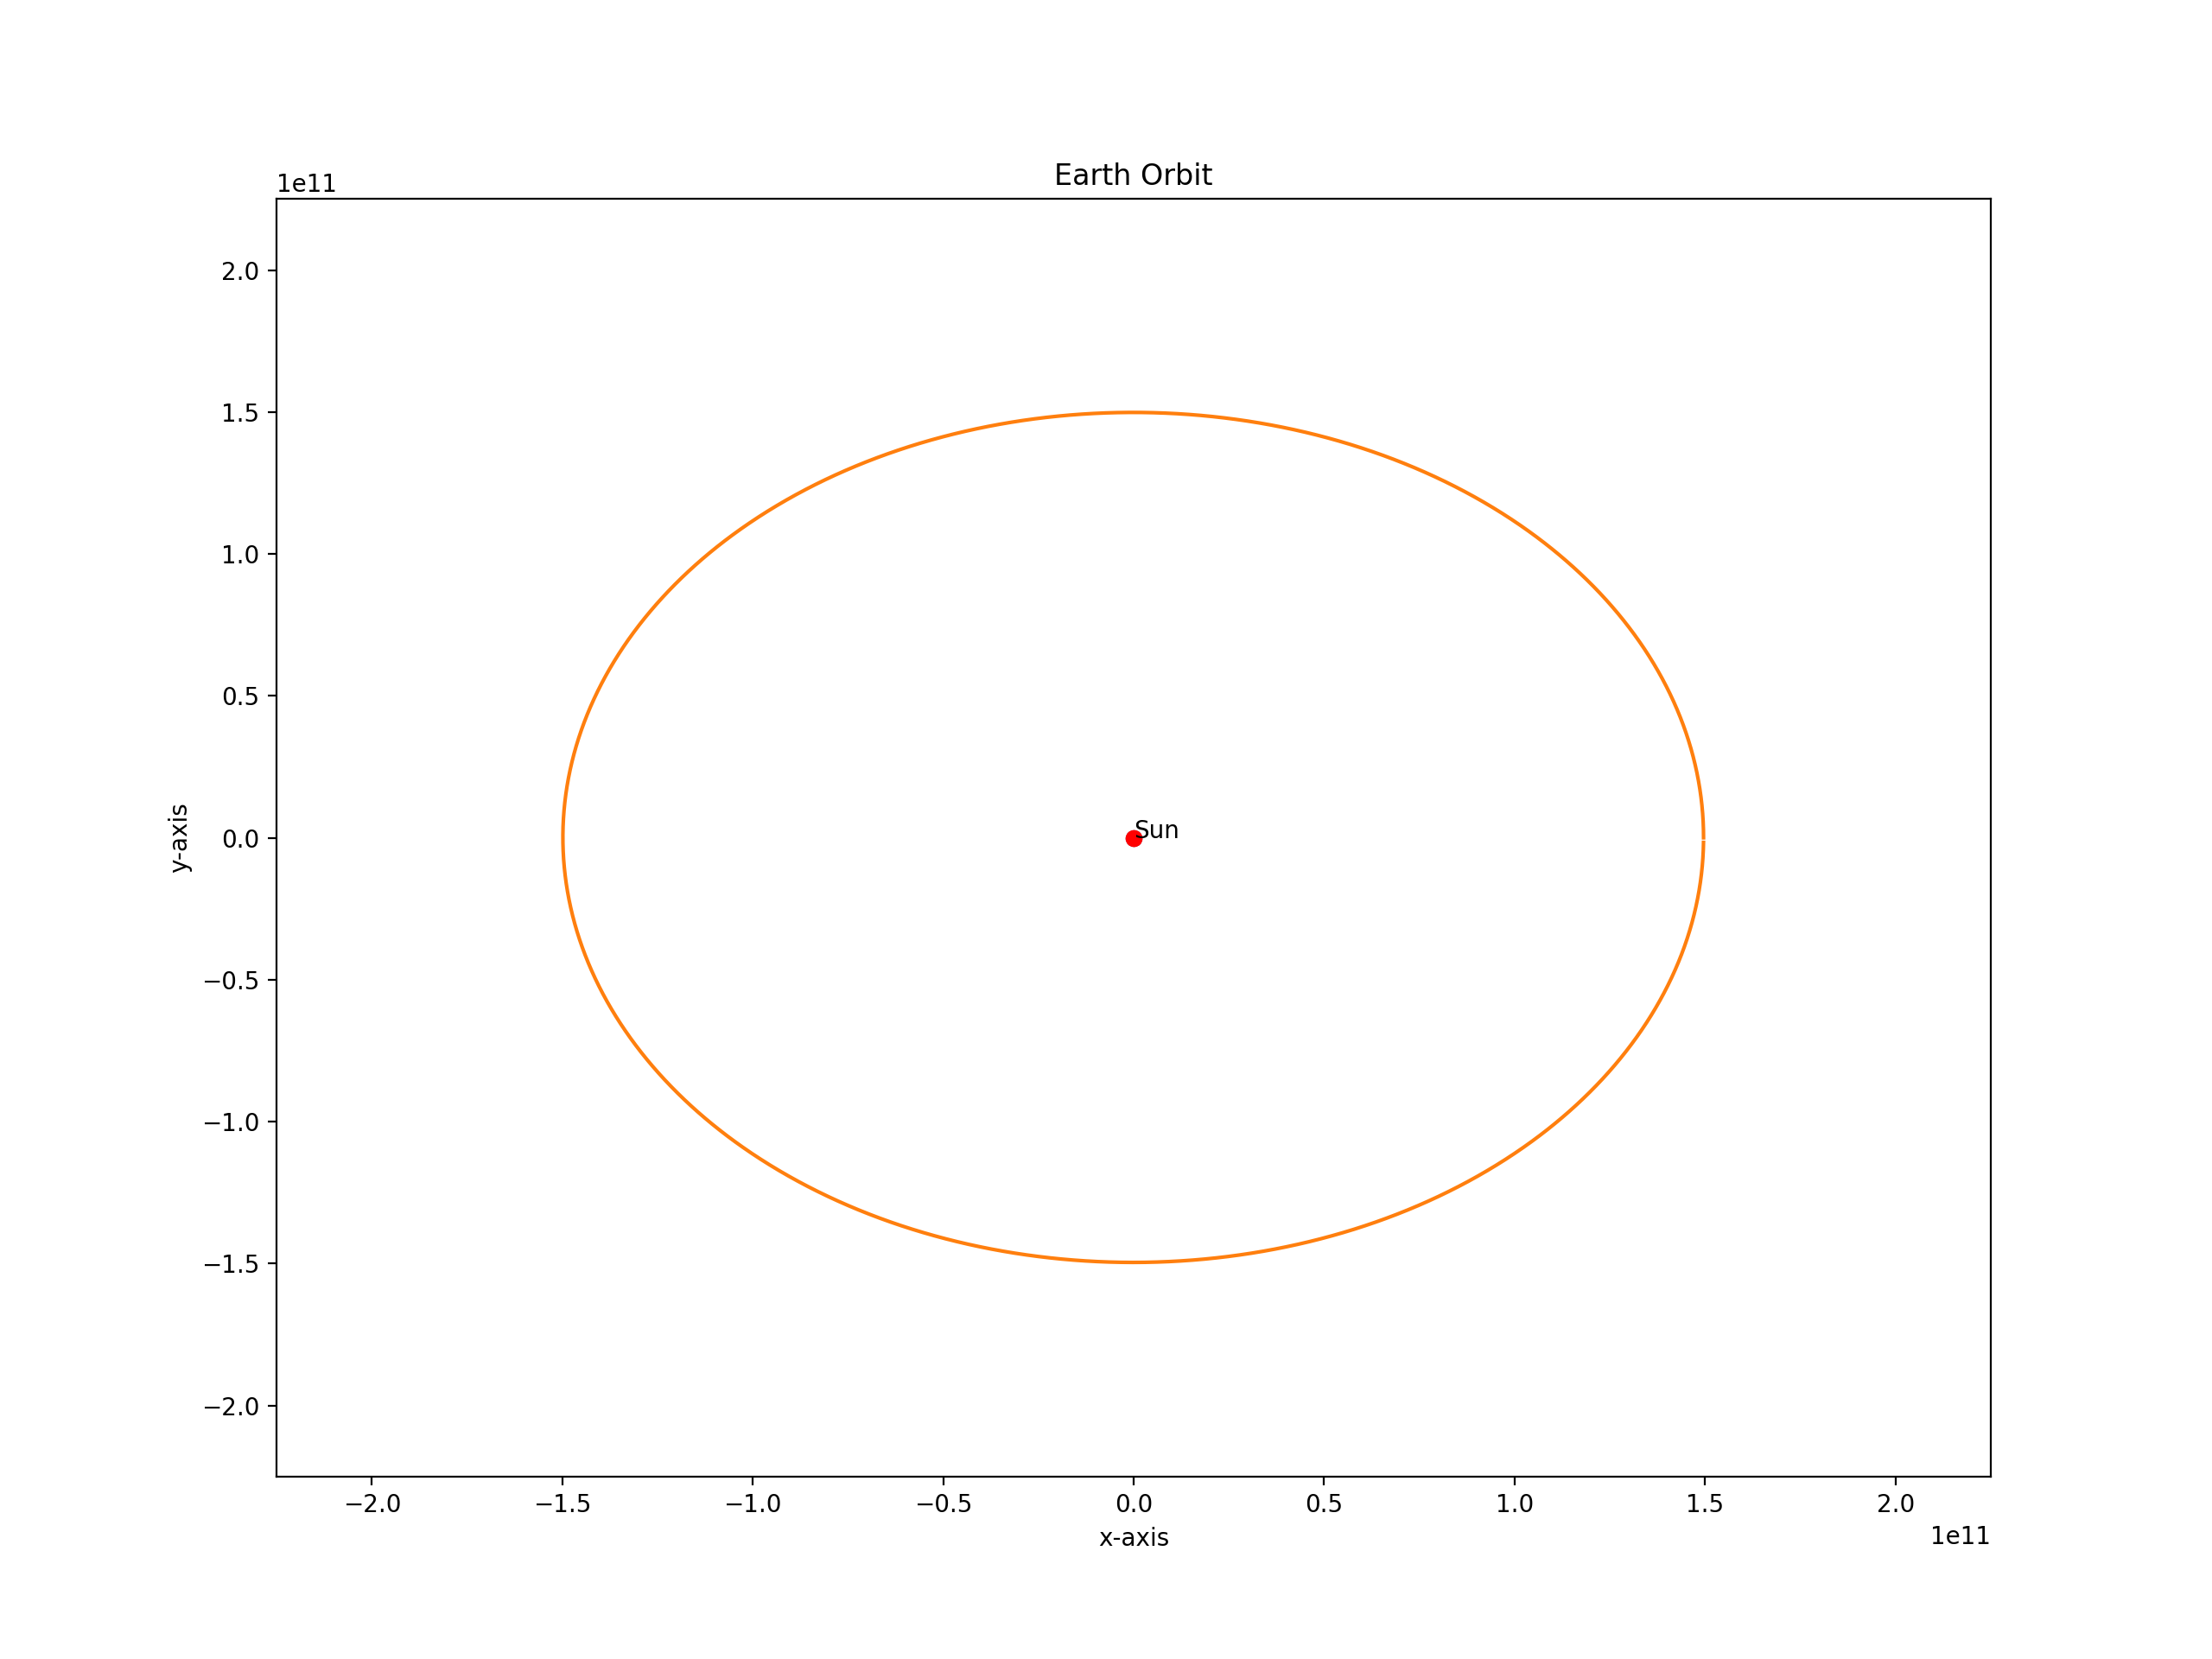

In [29]:
numberOfIterations = 3600
#finds the trajectory with given intital postion and velocity
points = orbit((orbitDistance,0),(0,29800))[0]

#plotting the path
fig = plt.figure()
ax = plt.axes(xlim=(-225e9, 225e9), ylim=(-225e9, 225e9))
point, = ax.plot(0,0, marker="o")
plt.plot([0,0],'ro')
plt.annotate("Sun",(0,0))

plt.title("Earth Orbit")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.plot(points[:,0], points[:,1])

plt.show()

After running the function above, we can see that this is what we were expecting: a closed path.

### Conservation of energy

We will be using the velocities and positions we calculated of Earth with initial velocity $v_0 = (0,29.8km \backslash s)$ to compute the total energy, given by the formula:

\begin{align}
E &= \textrm{kinetic energy + gravitational potential energy}\\ 
&= \frac{1}{2}m\dot{\underline{r}}^2+\frac{GM_{sun}m_{ear}}{\lvert \underline{r}\rvert}
\end{align}

We will iterate through all the points in the trjectory that we have calculated afore and calculate E at each point, store it in an array and plot it. We expect a horizontal line if the total energy of the system is conserved.

<IPython.core.display.Javascript object>


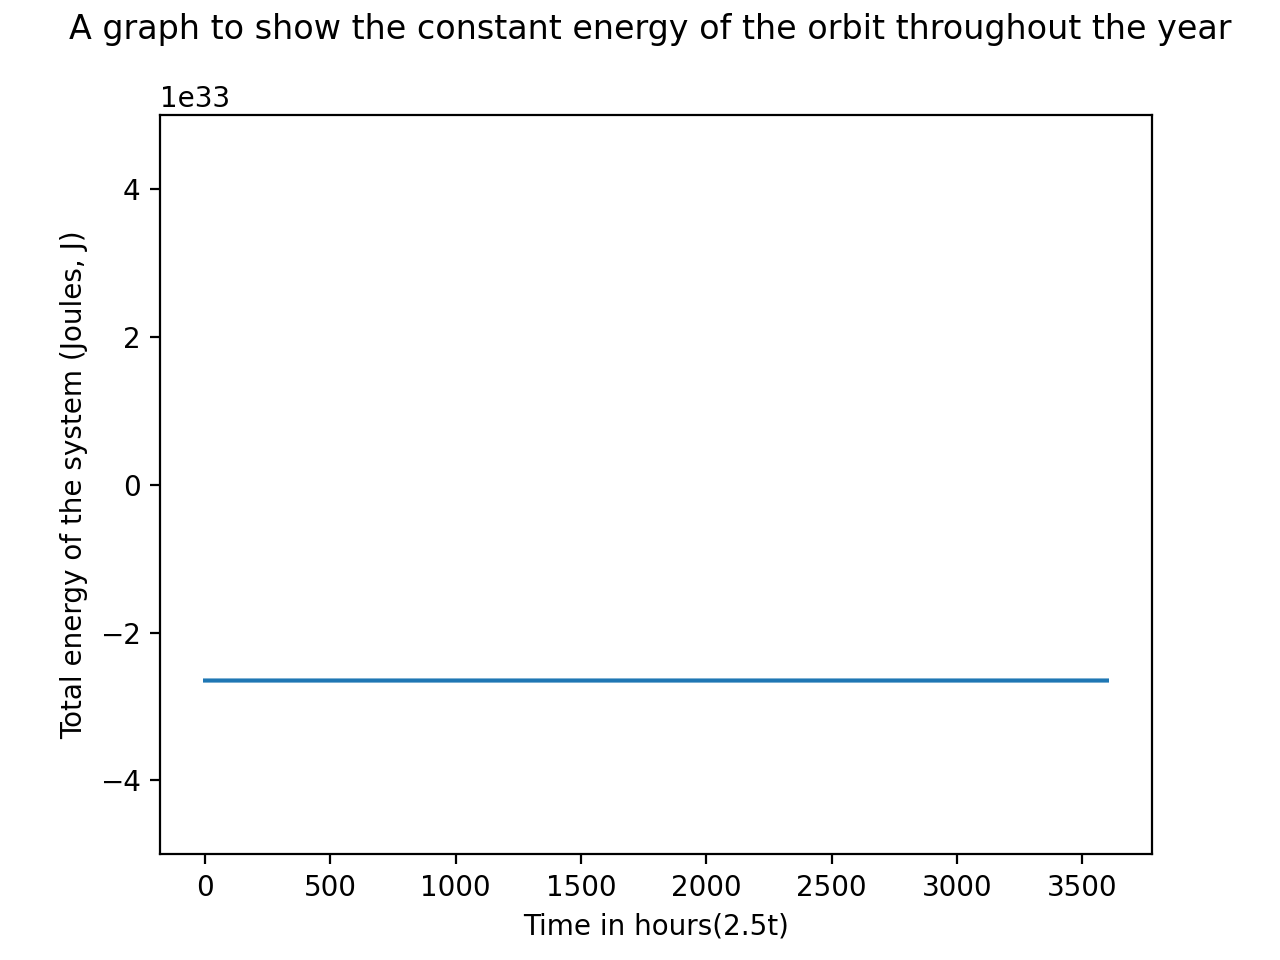

In [30]:
numberOfIterations = 3600
fig=plt.figure()
orbitTuple = orbit((orbitDistance,0),(0,29800))

points298 = orbitTuple[0]
velocities= orbitTuple[1]

E=[]
#build an array of energies corresponding to velocities.
for i in range(1,len(velocities)):
    E.append(0.5*earMass*np.dot(velocities[i],velocities[i])+ (-1 * G*sunMass*earMass/np.linalg.norm(points298[i])))
   
plt.ylim(-0.5e34, 0.5e34)

#plot energy throughout trajectory
plt.plot([j for j in range(len(velocities)-1)],E)


plt.xlabel("Time in hours(2.5t)") 
plt.ylabel("Total energy of the system (Joules, J)")
plt.title("A graph to show the constant energy of the orbit throughout the year ", y =1.08)
plt.show()

The graph shows what we were expecting, a horizontal lines. This confirms that the total energy of the system is conserved.

### Deriving value of v$_0$

The position of the earth simplified to 2 dimensional space $\underline{r}(t)$ in polar coordinates $(r,\theta)$ is given by:


$\underline{r}(t)=\begin{pmatrix} x \\ y \end{pmatrix}=\begin{pmatrix} r(t)cos\theta(t) \\ r(t) sin\theta(t) \end{pmatrix}$

$\rightarrow \dot{\underline{r}}= \begin{pmatrix} \dot{r}cos\theta-sin\theta\dot{\theta}r \\ \dot{r}sin\theta +cos\theta\dot{\theta}r \end{pmatrix}$

Using $\dot{r}$ to compute the Lagrangian L, given by the formula:

\begin{align}
L & =\frac{1}{2}m\underline{\dot{r}}^2-U\\
 & = \frac{1}{2}m(\dot{r}^2cos^2\theta +sin^2\theta\dot{\theta}^2r^2 +\dot{r}^2sin^2\theta +cos^2\theta\dot{\theta}r^2)\\
 & = \frac{1}{2}m(\dot{r}^2+\dot{\theta}^2r^2)+\frac{GMm}{r}
\end{align}


We can see that $\frac{\partial L}{\partial t}=0$ and the kinetic energy is quadratic in $\dot{r}$ and $\dot{\theta}$ so h=E=constant. Where h is generalised energy and E is the total energy of the system.

$$E=\frac{1}{2}m(\dot{r}^2+\dot{\theta}^2r^2)-\frac{GMm}{r} = c \ (constant) $$

Computing the momentum in the generalised coordinate $\theta$:
$$\frac{\partial L}{\partial \dot{\theta}}=mr^2\dot{\theta}=p_{\theta}\\
\rightarrow \dot{\theta}=\frac{p_{\theta}}{mr^2}$$
substituting this back into the formula for energy we have:
$$E=\frac{1}{2}m\dot{r}^2 +\frac{p_{\theta}}{2mr^2}-\frac{GMm}{r}$$

where
$$U_{eff}(r)=\frac{p_{\theta}}{2mr^2}-\frac{GMm}{r}$$

can be thought of as the effective potential of particle moving in 1-D.

So we get:

$$E=\frac{1}{2}m\dot{r}^2+U_{eff}(r)$$
We know the orbit is circular if $E=U_{eff}(r_{\star})$, where $r_{\star}$ is the equilibrium of the orbit radius. 

$$\rightarrow \frac{\partial U_{eff}}{\partial r}|r_{\star}=0\\
\rightarrow \frac{-p_{\theta}^2}{mr^3}+\frac{GMm}{r_{\star}^2}=0$$ 
$$\rightarrow  p_{\theta}^2=GMm^2r_{\star} $$

Substituting this back in for the equation for $\dot{\theta}$, we have:
$$\dot{\theta}=\frac{\pm \sqrt{GMmr_{\star}}}{mr_{\star}^2}\\=\pm \sqrt{GMr_{\star}^{-3}}$$

We can now calculate the tangential velocity for the circular orbit.
So we have:


\begin{align}
v_{tangent} &= \omega r\\
&=\dot{\theta}r= \sqrt{6.67\times 10^{-11} \times 1.989\times 10^{30} \times (149.59787\times 10^9)^{-3}}\times 149.59787\times 10^9 \\   & \approx 29.8km/s \end{align} 

\
\
This shows that there is only one initial value ($v_0$) for which the orbit is near circular. 


## Core 3

We will first use code to calculate the charateristics of the different trajectories of an Earth like planet with differing inital velocity. We will then graphically represent these characteristics. Finally, we will discuss the analytical aspects of the question. For each trajectory, we will calculate the aphelion and perihelon over a period of $3$ years, the total energy, whether an orbit is eliptical or parabolic or hyperbolic and, if the orbit is eliptical, its eccentricity. 

The chosen time frame, $3$ years, is arbitary and simply chosen to ensure that eliptical orbits of higher eccentricity and thus length can be completed. The constant representing this can be easily changed below, if desired.

Below is a description of how we calculate the chosen charateristics.

### Calculating the aphelion and perihelion of a trajectory

We calculate the aphelion and the perihelon empirically. We do this by iterating through the points of a trajectory and determining the point of maximum distance and the point of minimum distance. 

### Calculating eccentricity for elliptical orbits

Since for eliptical orbits we have a value for the aphelion and the perihelon we can simply determine the eccentricity via the below formula:

$$e=\frac{r_{a} - r_{p}}{r_{a} + r_{p}}$$

where $r_{a}$ and $r_{p}$ are the planet's distance from the Sun at its orbit's aphelion and perihelon respectively.

### Calculating whether an orbit is elliptic, parabolic or hyperbolic

We know that energy is conserved at all points in a trajectory. Thus if E > 0 at any point then E > 0 at all points, and if this is the case we know that a trajectory is hyperbolic since it implies that the planet is above escape velocity at all points. If E = 0, then the orbit is parabolic since the Earth-like planet will be exactly at the escape velocity. If E < 0 the orbit is, of course, elliptic because the Earth-like planet is below the escape velocity.




### Parameters
vValues is a list of the inital velocites we will be simulating. Add or change this list to see simulations for more velocites than those already listed. 

numberOfIterations represents the period of time over which the simulation will run. The simulation will run over numberOfIterations/3600 years. This can be changed at will.

In [34]:
vValues = [16000, 29800, 35000, 42127.47101257403, 64000] #chose whatever vValues you like, you will get the corresponding graphs 
                                        #and animations below
numberOfIterations = 10800 #changing to an approriate lenght (~3 years) 
                           #so that full orbit of longer orbits can be seen

We simulate trajectories and calculate the characteristics below. Again, we use initial positions of $r_0=(149.59787\times 10^9 m ,0)$ for the Earth like planet and $r_0=(0 ,0)$ for the Sun. We use an initial velocity of $v_0 = (0,29.8km \backslash s)$ for the Earth like planet and treat the Sun as fixed. 

In [35]:
pointsDictionary = {}

#create a dictionary of points where the earth like planet's inital velocity is the key
for v in vValues:
    
    pointsDictionary[v] = orbit((orbitDistance,0),(0,v))[0]

#for each trajectory, create a dictionary of characteristics where the inital velocity is the key
trajectoryCharacteristics = {}

for key in pointsDictionary:
    
    #defining variables
    orbitType = ''
    
    points = pointsDictionary[key]
    
    index = 0
    
    minDistanceIndex = 0
    maxDistanceIndex = 0
    
    #at the start these statements are true, if i were to initalise with 0 then that would never be changed etc
    minDistanceCoords = [orbitDistance, 0]
    
    maxDistanceCoords = [orbitDistance, 0]
    
    minDistance = sqrt((points[0][0] ** 2) + (points[0][1] ** 2))
    
    maxDistance = sqrt((points[0][0] ** 2) + (points[0][1] ** 2))
    
    energy = (0.5*earMass*(key **2))- ( (G*sunMass*earMass)/(orbitDistance))
    
    #categorise trajectories accordingly
    if energy < 0:
        orbitType = 'Elliptical'
    elif energy == 0:
        orbitType = 'Parabolic'
    elif energy > 0:
        orbitType = 'Hyperbolic'
    
    #empirically calculate the min and max points.
    for point in points:
        
        distance = sqrt((point[0]**2) + (point[1] **2))
        
        if distance > maxDistance:
            maxDistance = distance
            maxDistanceIndex = index
            
            maxDistanceCoords[0] = point[0]
            maxDistanceCoords[1] = point[1]
            
        if distance < minDistance:
            
            minDistance = distance
            minDistanceIndex = index
            
            minDistanceCoords[0] = point[0]
            minDistanceCoords[1] = point[1]
        
        index += 1
    
    eccentricity = (maxDistance - minDistance) / (maxDistance + minDistance)
    
    trajectoryCharacteristics[key] = {
        
        'minDistanceIndex': minDistanceIndex,
        'maxDistanceIndex': maxDistanceIndex,
        'minDistance': minDistance,
        'maxDistance': maxDistance,
        'minDistanceCoords': minDistanceCoords,
        'maxDistanceCoords': maxDistanceCoords,
        'e':eccentricity,
        'energy':energy,
        'orbitType': orbitType
        
    }

Now that we have the simulated and caclulated information, we will represent it graphically. Note that e represents eccentricity, Per represents Perihelion and Aph represents Aphelion. 

<IPython.core.display.Javascript object>


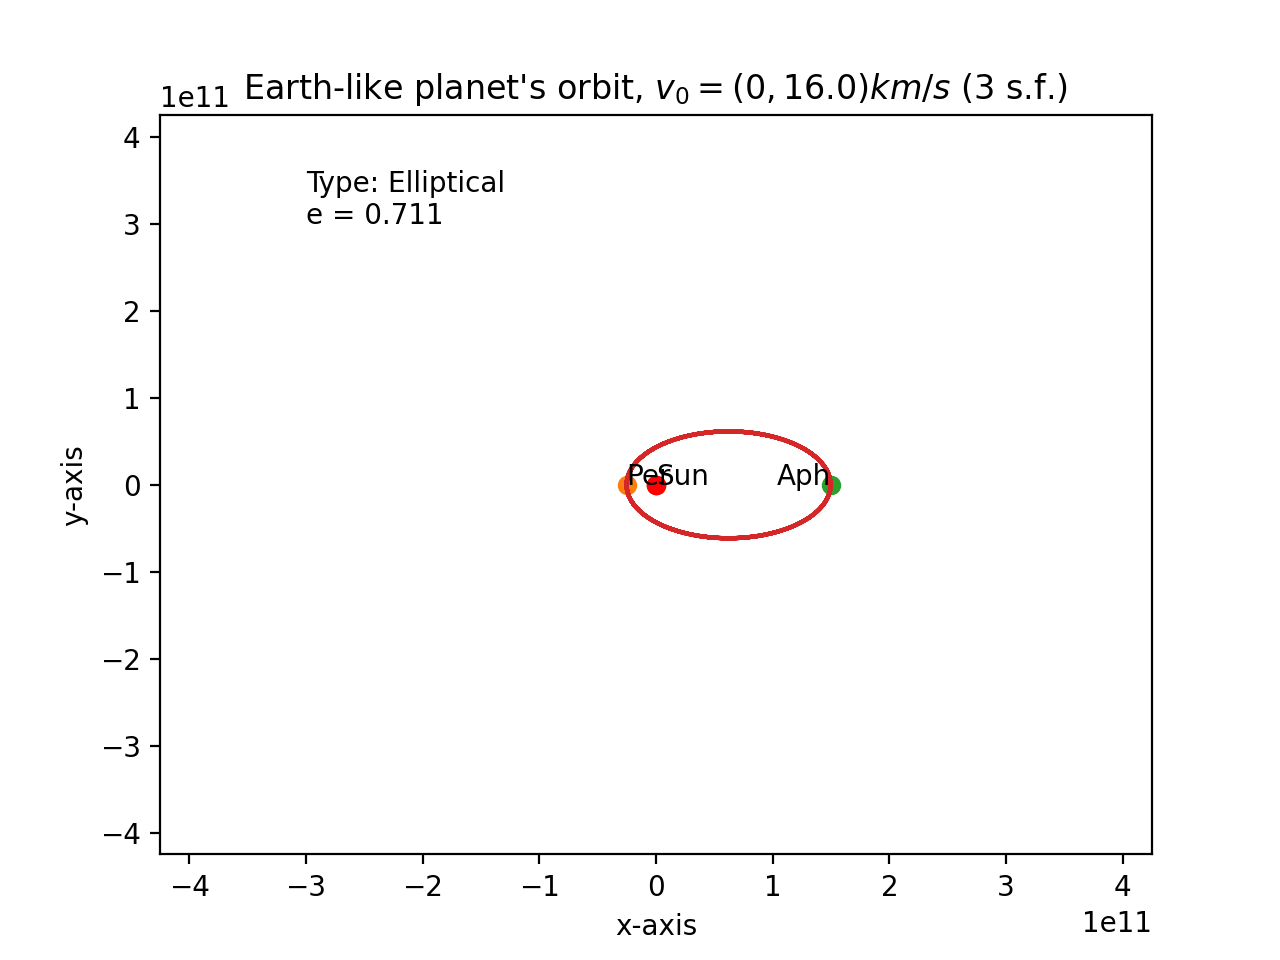

<IPython.core.display.Javascript object>


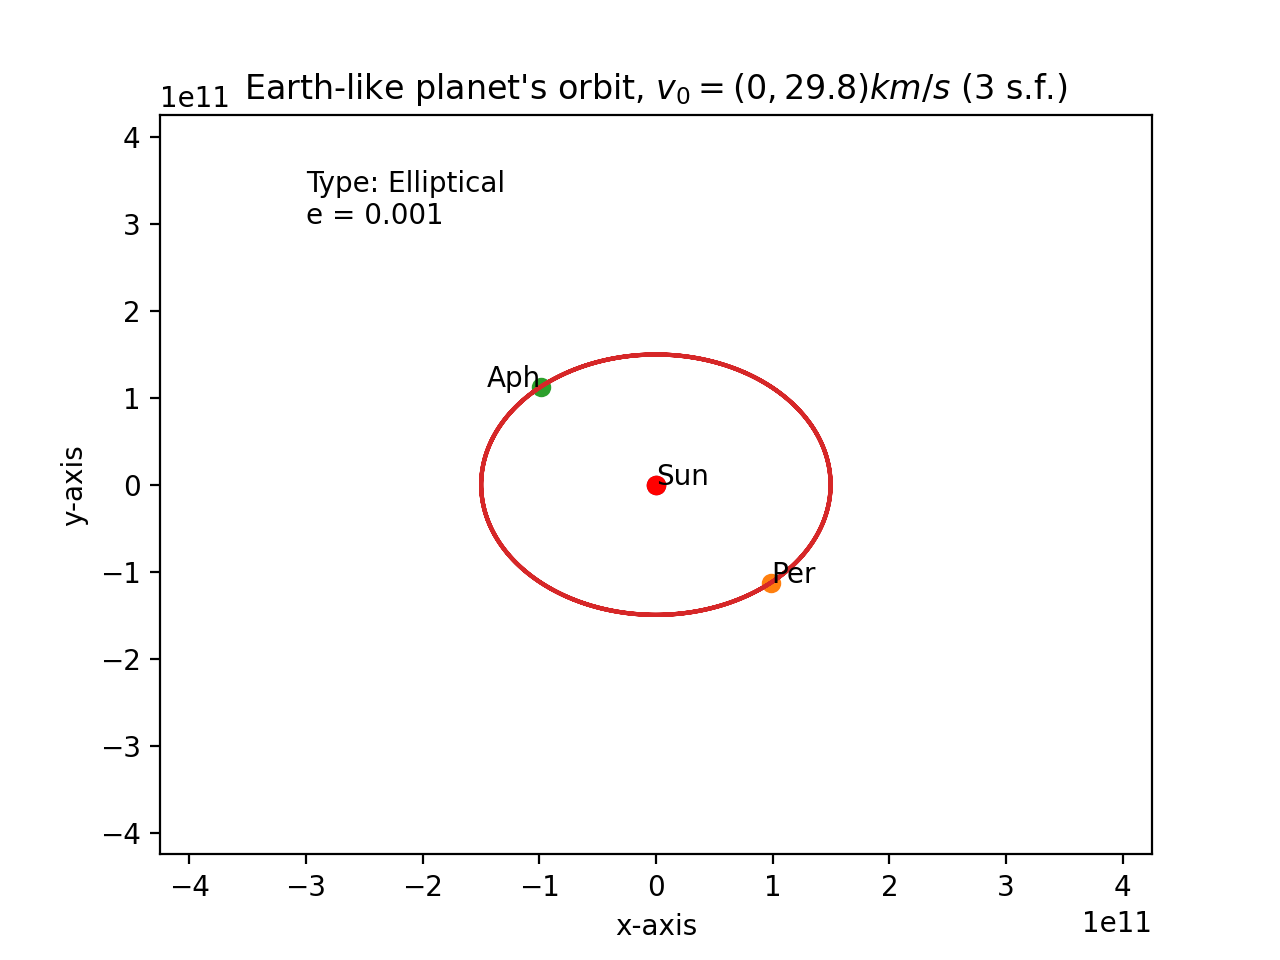

<IPython.core.display.Javascript object>


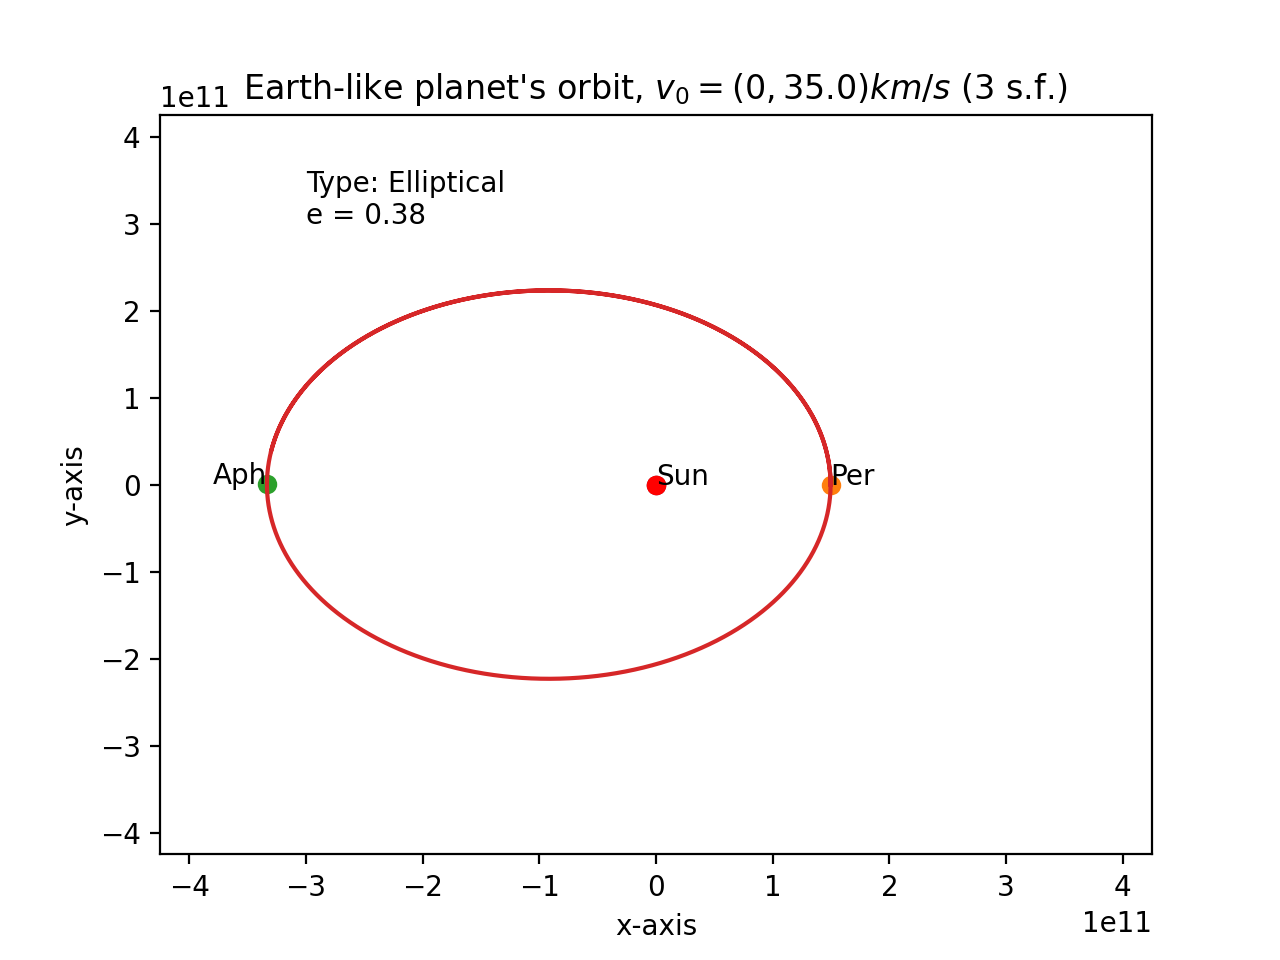

<IPython.core.display.Javascript object>


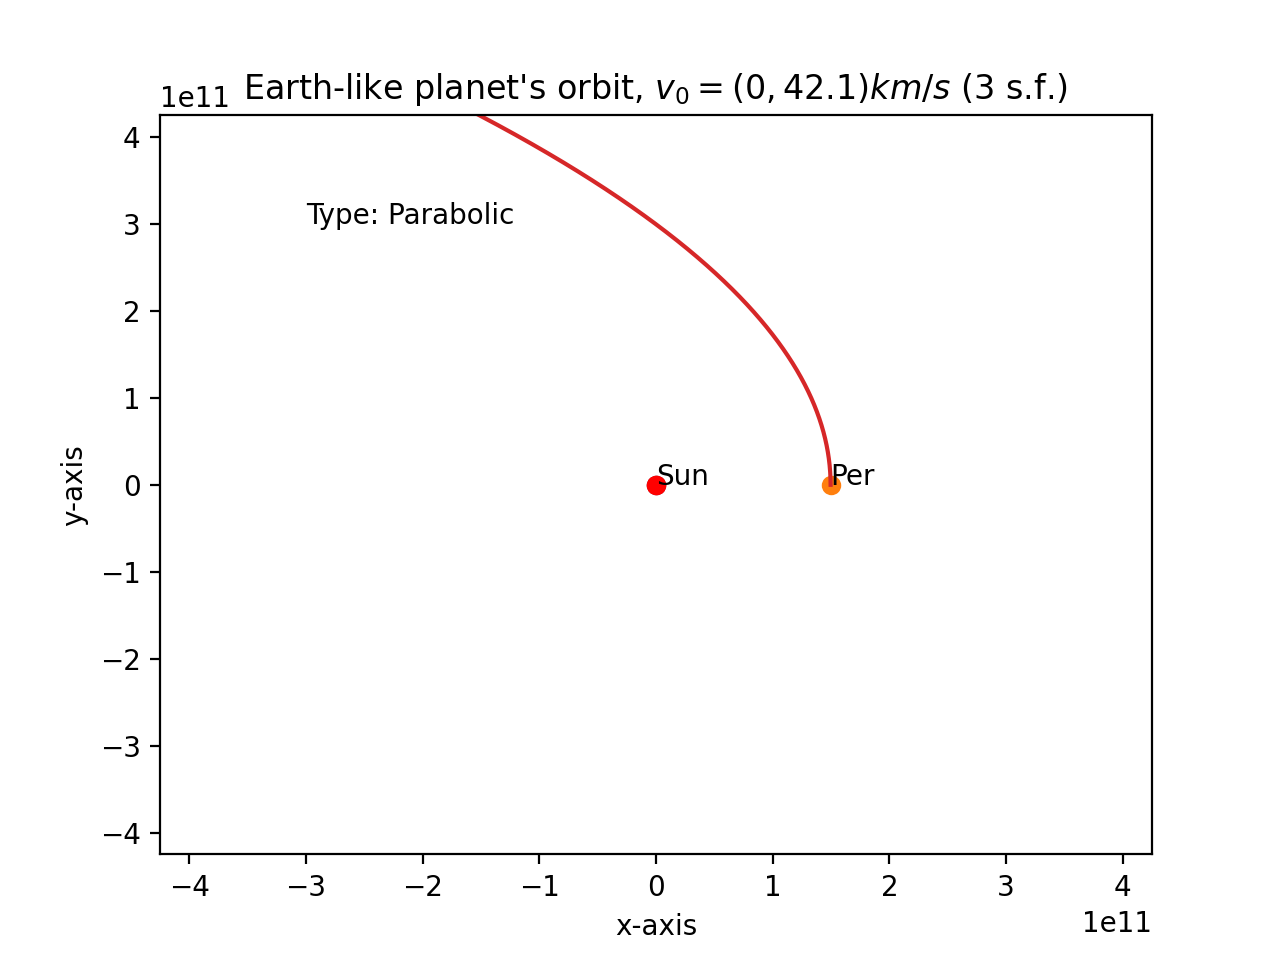

<IPython.core.display.Javascript object>


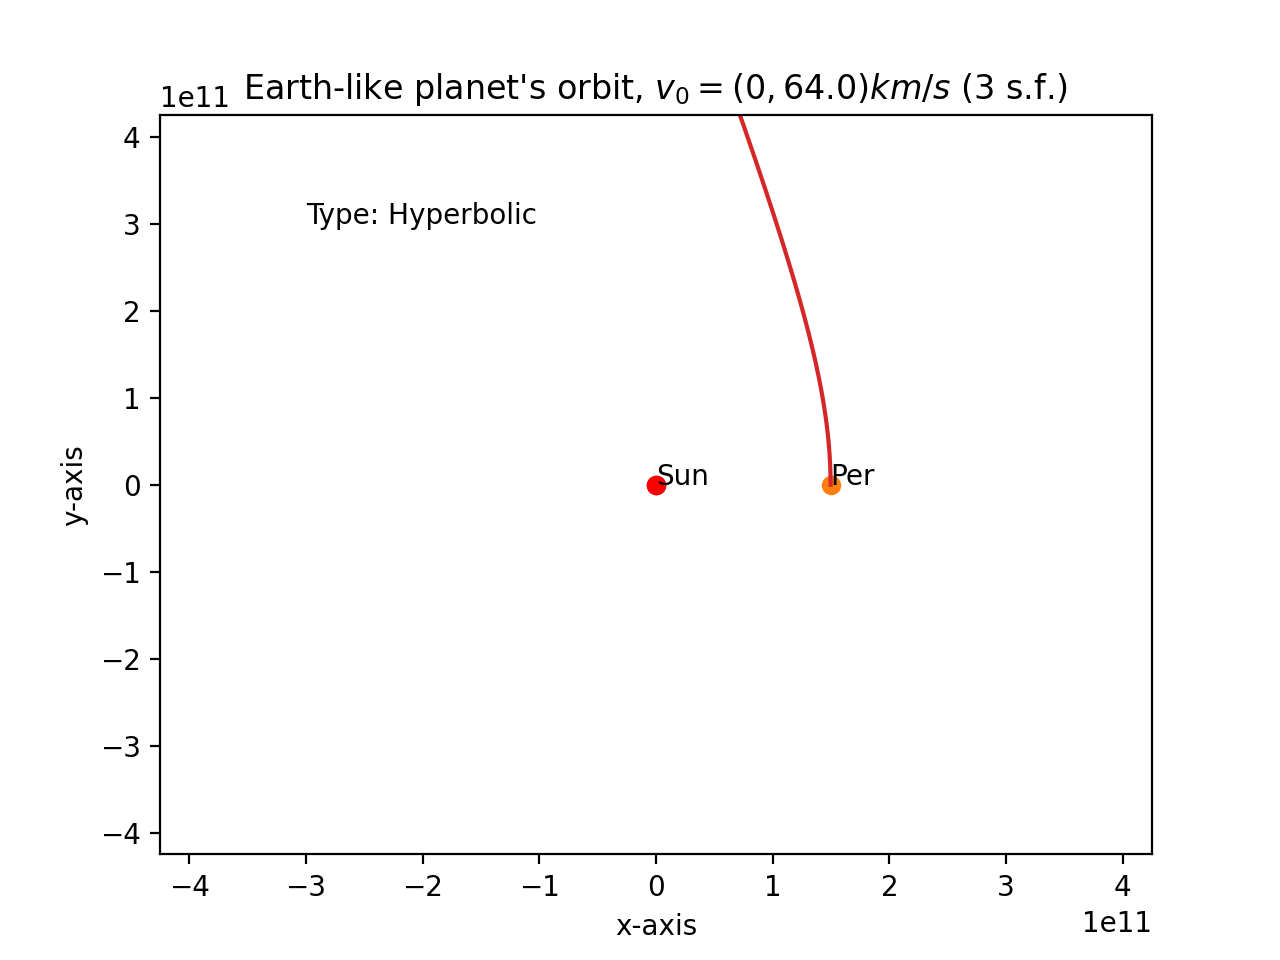

In [36]:

for key in trajectoryCharacteristics:
    fig = plt.figure()
    ax = plt.axes(xlim=(-425e9, 425e9), ylim=(-425e9, 425e9))

    #annotating sun

    point, = ax.plot(0,0, marker="o")
    plt.plot([0,0],'ro')
    plt.annotate("Sun",(0,0))

    #annotating apopsis and perihelon
    plt.plot(trajectoryCharacteristics[key]['minDistanceCoords'][0],trajectoryCharacteristics[key]['minDistanceCoords'][1] , 'o')
    plt.annotate("Per",trajectoryCharacteristics[key]['minDistanceCoords'], ha='left')
    
    plt.plot(trajectoryCharacteristics[key]['maxDistanceCoords'][0],trajectoryCharacteristics[key]['maxDistanceCoords'][1] , 'o')

    plt.annotate("Aph",trajectoryCharacteristics[key]['maxDistanceCoords'], ha='right')
    
    #annotate orbit type
    
    if trajectoryCharacteristics[key]['orbitType'] == 'Elliptical':
        
        plt.text(-3e11,3e11, 'Type: ' + trajectoryCharacteristics[key]['orbitType']  + '\ne = ' + str(round(trajectoryCharacteristics[key]['e'], 3)) )
    else:
        plt.text(-3e11,3e11, 'Type: ' + trajectoryCharacteristics[key]['orbitType'])
    
    
    #formate velocity to 3s.f
    formattedNumber = np.format_float_positional(key/1000, precision=3, unique=False, fractional=False, trim='k')
    
    plt.title("Earth-like planet's orbit, $v_{0} = (0, " + str(formattedNumber) + ") km/s$" + " (3 s.f.)")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    
    plt.plot(pointsDictionary[key][:,0], pointsDictionary[key][:,1], label=str(key))

    plt.show()

We will now visualise all trajectories on the same graph.

<IPython.core.display.Javascript object>


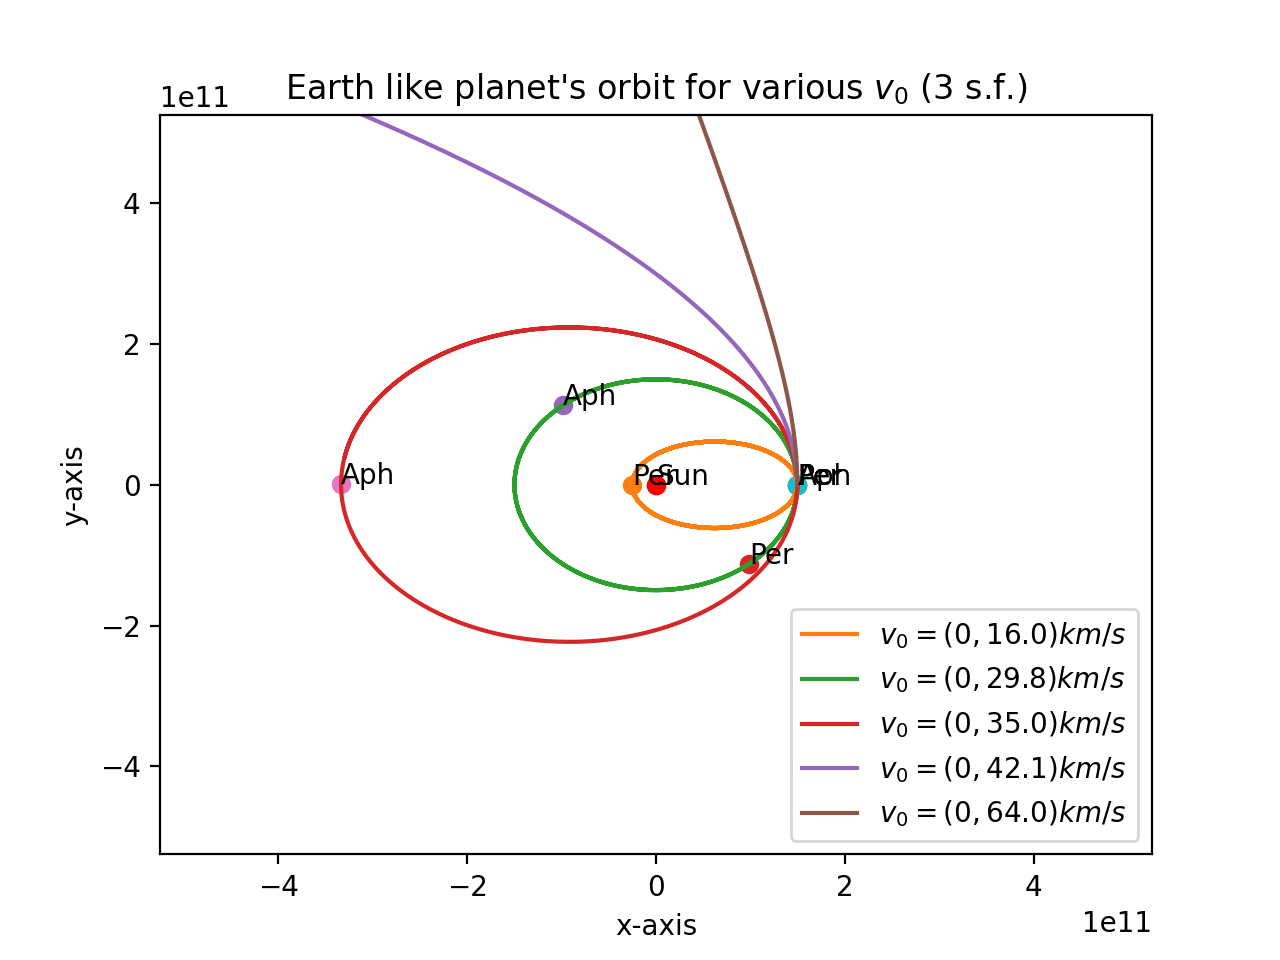

In [37]:
#this time we don't create a new figure for each trajectory, thus they appear on the same one
fig = plt.figure()
ax = plt.axes(xlim=(-525e9, 525e9), ylim=(-525e9, 525e9))

#annotating sun

point, = ax.plot(0,0, marker="o")
plt.plot([0,0],'ro')
plt.annotate("Sun",(0,0))

#annotating apopsis and perihelon

for key in trajectoryCharacteristics:
    
    plt.plot(trajectoryCharacteristics[key]['minDistanceCoords'][0],trajectoryCharacteristics[key]['minDistanceCoords'][1] , 'o')
    plt.annotate("Per",trajectoryCharacteristics[key]['minDistanceCoords'])
    
    plt.plot(trajectoryCharacteristics[key]['maxDistanceCoords'][0],trajectoryCharacteristics[key]['maxDistanceCoords'][1] , 'o')

    plt.annotate("Aph",trajectoryCharacteristics[key]['maxDistanceCoords'])
    
plt.title("Earth like planet's orbit for various $v_0$ (3 s.f.)")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

for key in trajectoryCharacteristics:
    
    formattedNumber = np.format_float_positional(key/1000, precision=3, unique=False, fractional=False, trim='k')

    #plot trajectories
    plt.plot(pointsDictionary[key][:,0], pointsDictionary[key][:,1], label=str("$v_{0} = (0, " + str(formattedNumber) + ") km/s$" ))

plt.legend(loc="lower right")

plt.show()

We will now visualise all orbits animated on the same graph.

In [38]:
fig = plt.figure()
ax = plt.axes(xlim=(-525e9, 525e9), ylim=(-525e9, 525e9))

#set up our points to be annotated
animatingPointsDictionary = {}

for key in pointsDictionary:
    
    animatingPointsDictionary[key], = ax.plot(0,0, marker="o")
    
plt.plot([0,0],'ro')
plt.annotate("Sun",(0,0))
plt.title("Earth like planet's orbit animation for $v_0$ (3 s.f.)")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

anim = animation.FuncAnimation(fig, animateMultiple, init_func=init,
                               interval=1, blit=True, frames=numberOfIterations, save_count=300)

for key in pointsDictionary:
    formattedNumber = np.format_float_positional(key/1000, precision=3, unique=False, fractional=False, trim='k')

    plt.plot(pointsDictionary[key][:,0], pointsDictionary[key][:,1], label=str("$v_{0} = (0, " + str(formattedNumber) + ") km/s$" ))

plt.legend(loc="lower right")

plt.show()

<IPython.core.display.Javascript object>

### Analytic Results

### Escape speed

We know that the escape speed of an approximately circular Earth like planet from a massive approximately circular object like the Sun at a certain distance is given by the below equation:
$$v=\sqrt{\frac{2GM}{R}}$$

where $G$ is the gravitational constant, $M$ the mass of the Sun and $R$ the distance from the Sun.

At $R = 149.59787\times 10^9$ we get:
\begin{align}
v &= \sqrt{\frac{2 \times 6.67408 \times 10^{-11} \times 1.989 \times 10^{30}}{149.59787\times 10^9}} \\
&= 42127.47101257403 m/s \end{align} 




### Corresponding Energy

For an inital speed equal to the escape speed above, $v = 42127.47101257403m/s$ we get the following calculation for energy:

\begin{align}
E &= \textrm{kinetic energy + gravitational potential energy}\\ 
&= \frac{1}{2}m\dot{\underline{r}}^2+\frac{GM_{sun}m_{ear}}{\lvert \underline{r}\rvert}\\
&= (\frac{1}{2} \times 5.9722 \times 10^{24} \times (42127.47101257403^2)-\frac{6.67408 \times 10^{-11} \times 1.989 \times 10^{30} \times 5.9722 \times 10^{24}}{149.59787 \times 10^{9}}\\
&= 0
\end{align}



### Theoretical result for corresponding energy.

As energy is conserved we can form the following equation

$$\frac{1}{2}m_{ear}{{ (\dot r_{inital})}}^2+\frac{GM_{sun}m_{ear}}{\lvert {r_{inital}}\rvert} = \frac{1}{2}m_{ear}{{ (\dot r_{infinity})}}^2+\frac{GM_{sun}m_{ear}}{\lvert {r_{infinity}}\rvert}$$

Now, if a planet is at the exact escape speed for a given distance then we should should expect that at $r= \infty$, its kinetic energy is zero since it should've slowed to a halt. Therefore we have the following:



\begin{align}
\frac{1}{2}m_{ear}{{ (\dot r_{inital})}}^2+\frac{GM_{sun}m_{ear}}{\lvert {r_{inital}}\rvert} &= \frac{1}{2}m_{ear}0+\frac{GM_{sun}m_{ear}}{\infty}\\ 
&= 0\\
\end{align}

And thus we see that the theoretical corresponding energy for a speed equal to the escape speed is 0. This is expected because from the above we have:

\begin{align}
\frac{1}{2}m_{ear}{{ (\dot r_{inital})}}^2 &= -\frac{GM_{sun}m_{ear}}{\lvert {r_{inital}}\rvert}
\end{align}

and thus:

$$\dot r_{inital}=\sqrt{\frac{2GM_{sun}}{\lvert {r_{inital}}\rvert}}$$

which is the equation we used to calculate the escape velocity in the first instance.

##  Question 5

In this section we take a look at the three body problem:

In [39]:
numberOfIterations = 3600

# calculates the trajectories and velocities of three seperate bodies
def relativeThreeOrbit(r01, v01, r02,v02,r03,v03,m1,m2,m3):
    dt = 3.15e7 / 3600  # using a timestamp of roughly 2.5 hours

    # initilising variables and storing initial conditions
    r1Vect = np.zeros(((numberOfIterations + 1), 2))
    a1Vect = np.zeros(((numberOfIterations + 1), 2))
    v1Vect = np.zeros(((numberOfIterations + 1), 2))

    r2Vect = np.zeros(((numberOfIterations + 1), 2))
    a2Vect = np.zeros(((numberOfIterations + 1), 2))
    v2Vect = np.zeros(((numberOfIterations + 1), 2))

    r3Vect = np.zeros(((numberOfIterations + 1), 2))
    a3Vect = np.zeros(((numberOfIterations + 1), 2))
    v3Vect = np.zeros(((numberOfIterations + 1), 2))

    modr1r2Vect = np.zeros(((numberOfIterations + 1), 2))
    modr1r3Vect = np.zeros(((numberOfIterations + 1), 2))
    modr2r3Vect = np.zeros(((numberOfIterations + 1), 2))

    r1Vect[0] = r01
    v1Vect[0] = v01
    r2Vect[0] = r02
    v2Vect[0] = v02
    r3Vect[0] = r03
    v3Vect[0] = v03
    
    modr1r2Vect[0] = r1Vect[0] - r2Vect[0]
    modr1r3Vect[0] = r1Vect[0] - r3Vect[0]
    modr2r3Vect[0] = r2Vect[0] - r3Vect[0]

    # uses the velocity Verlet algorithm to compute positions,acceleration and velocities of each body 
    for i in range(numberOfIterations):
        
        r1Vect[i + 1] = (r1Vect[i]) + (v1Vect[i] * dt) + (0.5 * a1Vect[i] * (dt ** 2))
        r2Vect[i + 1] = (r2Vect[i]) + (v2Vect[i] * dt) + (0.5 * a2Vect[i] * (dt ** 2))
        r3Vect[i + 1] = (r3Vect[i]) + (v3Vect[i] * dt) + (0.5 * a3Vect[i] * (dt ** 2))
        
        
        modr1r2Vect[i + 1] = r1Vect[i + 1] - r2Vect[i + 1]
        modr1r3Vect[i + 1] = r1Vect[i + 1] - r3Vect[i + 1]
        modr2r3Vect[i + 1] = r2Vect[i + 1] - r3Vect[i + 1]
        
        a1Vect[i + 1] = (twoBodyForce(modr1r2Vect[i + 1], m1,m2) + twoBodyForce(modr1r3Vect[i + 1], m1,m3)) / m1
        a2Vect[i + 1] = twoBodyForce(modr2r3Vect[i + 1], m2, m3) / m2 + twoBodyForce(-modr1r2Vect[i + 1], m1,m2) / m2
        a3Vect[i + 1] = twoBodyForce(-modr1r3Vect[i + 1], m1, m3) / m3 + twoBodyForce(-modr2r3Vect[i + 1], m2, m3) / m3
        
        v1Vect[i + 1] = (v1Vect[i]) + (0.5 * (a1Vect[i + 1] + a1Vect[i]) * dt)
        v2Vect[i + 1] = (v2Vect[i]) + (0.5 * (a2Vect[i + 1] + a2Vect[i]) * dt)
        v3Vect[i + 1] = (v3Vect[i]) + (0.5 * (a3Vect[i + 1] + a3Vect[i]) * dt)
        
    # returning the path of each body
    return {"Body 1":r1Vect, "Body 2":r2Vect,"Body 3": r3Vect}

## Scenario 1:
In this first scenario, we have three bodies, each with a similar mass to the sun. In the animation you can see it quickly devolves to chaotic orbits.

In [40]:
pointsDictionary = relativeThreeOrbit((0,0),(0,0), (orbitDistance,0),(0,50000), (0,orbitDistance),(0,40000), sunMass,sunMass,sunMass)

fig = plt.figure()
ax = plt.axes(xlim=(-525e9, 525e9), ylim=(-525e9, 525e9))

animatingPointsDictionary = {}

for key in pointsDictionary:
    animatingPointsDictionary[key], = ax.plot(0, 0, marker="o")

point, = ax.plot(0,0, marker="o")
plt.title("Three Body Orbits")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

anim = animation.FuncAnimation(fig, animateMultiple, init_func=init,
                               interval=1, blit=True, frames=1800, save_count=300)

for key in pointsDictionary:
    plt.plot(pointsDictionary[key][:, 0], pointsDictionary[key][:, 1], label=key)

plt.legend(loc="upper left")

plt.show()

<IPython.core.display.Javascript object>

## Scenario 2:
In this scenario, we have another three bodies with different masses and inital speeds. This example also leads to chaotic trajectories. 

In [41]:
pointsDictionary = relativeThreeOrbit((0,0),(70000,50000), (orbitDistance,0),(0,50000), (0,orbitDistance),(0,30000), earMass,sunMass,sunMass)
fig = plt.figure()
ax = plt.axes(xlim=(-525e9, 525e9), ylim=(-525e9, 525e9))

animatingPointsDictionary = {}

for key in pointsDictionary:
    animatingPointsDictionary[key], = ax.plot(0, 0, marker="o")

point, = ax.plot(0,0, marker="o")
plt.title("Three Body Orbits")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

anim = animation.FuncAnimation(fig, animateMultiple, init_func=init,
                               interval=1, blit=True, frames=1800, save_count=300)

for key in pointsDictionary:
    plt.plot(pointsDictionary[key][:, 0], pointsDictionary[key][:, 1], label=key)

plt.legend(loc="upper left")
writervideo = animation.FFMpegWriter(fps=24, bitrate=2000)
anim.save('three2.mp4', writer=writervideo, dpi=200)      

plt.show()

<IPython.core.display.Javascript object>

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1280x960', '-pix_fmt', 'rgba', '-r', '24', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-b', '2000k', '-y', 'three2.mp4']' returned non-zero exit status 255.

## Question 7

In this section we will firstly simulate a two body system of a Sun like planet initally centred at $r_0=(0 ,0)$ with inital velocity $v_0 = (0,0)ms^{-1}$ and a Jupiter like planet initally at $r_0=(149.59787\times 10^9 m ,0)$ with an inital velocity of $v_0 = (0, 30.0km \backslash s)$. 

We initally run the simulation using the velocity Verlet algorithm $k = 30000$ times with a $dt$ of roughly $2.5h$, equivilant to the number of seconds in a year divided by $3600$. This means that the simulation runs over the course of about 8 years. This is to ensure we see the full range of dynamics.



### Utility Function

In [42]:
def relativeTwoOrbit(r01, v01, r02,v02,m1,m2):
    dt = 3.15e7 / 3600  # using a timestamp of roughly 2.5 hours

    # initilising variables and storing initial conditions
    r1Vect = np.zeros(((numberOfIterations + 1), 2))
    a1Vect = np.zeros(((numberOfIterations + 1), 2))
    v1Vect = np.zeros(((numberOfIterations + 1), 2))

    r2Vect = np.zeros(((numberOfIterations + 1), 2))
    a2Vect = np.zeros(((numberOfIterations + 1), 2))
    v2Vect = np.zeros(((numberOfIterations + 1), 2))

    modr1r2Vect = np.zeros(((numberOfIterations + 1), 2))
    
    centreOfGravity = np.zeros(((numberOfIterations + 1), 2))

    r1Vect[0] = r01
    v1Vect[0] = v01
    r2Vect[0] = r02
    v2Vect[0] = v02
    
    #calc inital cog and variable
    centreOfGravity[0] = ((m1 * r1Vect[0]) + (m2* r2Vect[0])) / (m1 + m2)
    
    modr1r2Vect[0] = r1Vect[0] - r2Vect[0]
    
    # uses the velocity Verlet algorithm to compute positions,acceleration and velocities of each body 
    for i in range(numberOfIterations):
        
        r1Vect[i + 1] = (r1Vect[i]) + (v1Vect[i] * dt) + (0.5 * a1Vect[i] * (dt ** 2))
        r2Vect[i + 1] = (r2Vect[i]) + (v2Vect[i] * dt) + (0.5 * a2Vect[i] * (dt ** 2))
        
        modr1r2Vect[i+1] = r1Vect[i+1] - r2Vect[i+1]

        a1Vect[i + 1] = (twoBodyForce(modr1r2Vect[i+1], m1,m2))  / m1
        a2Vect[i + 1] = (twoBodyForce(-modr1r2Vect[i+1], m1,m2))  / m2
        
        v1Vect[i + 1] = (v1Vect[i]) + (0.5 * (a1Vect[i + 1] + a1Vect[i]) * dt)
        v2Vect[i + 1] = (v2Vect[i]) + (0.5 * (a2Vect[i + 1] + a2Vect[i]) * dt)
        
        centreOfGravity[i+1] = ((m1 * r1Vect[i+1]) + (m2* r2Vect[i+1])) / (m1 + m2)

    return {"Body 1":r1Vect, 
            "Body 2":r2Vect,
            "Centre of Gravity": centreOfGravity, 
            "accBodyOne": a1Vect, 
            "vB1": v1Vect,
            "accBodyTwo": a2Vect,
            "vB2": v2Vect}

### Constants

In [14]:
jupMass = 1.898 * (10**27)
jupiterOrbitDistance = orbitDistance 
vValue = 30000

### Overview of Trajectories

<IPython.core.display.Javascript object>


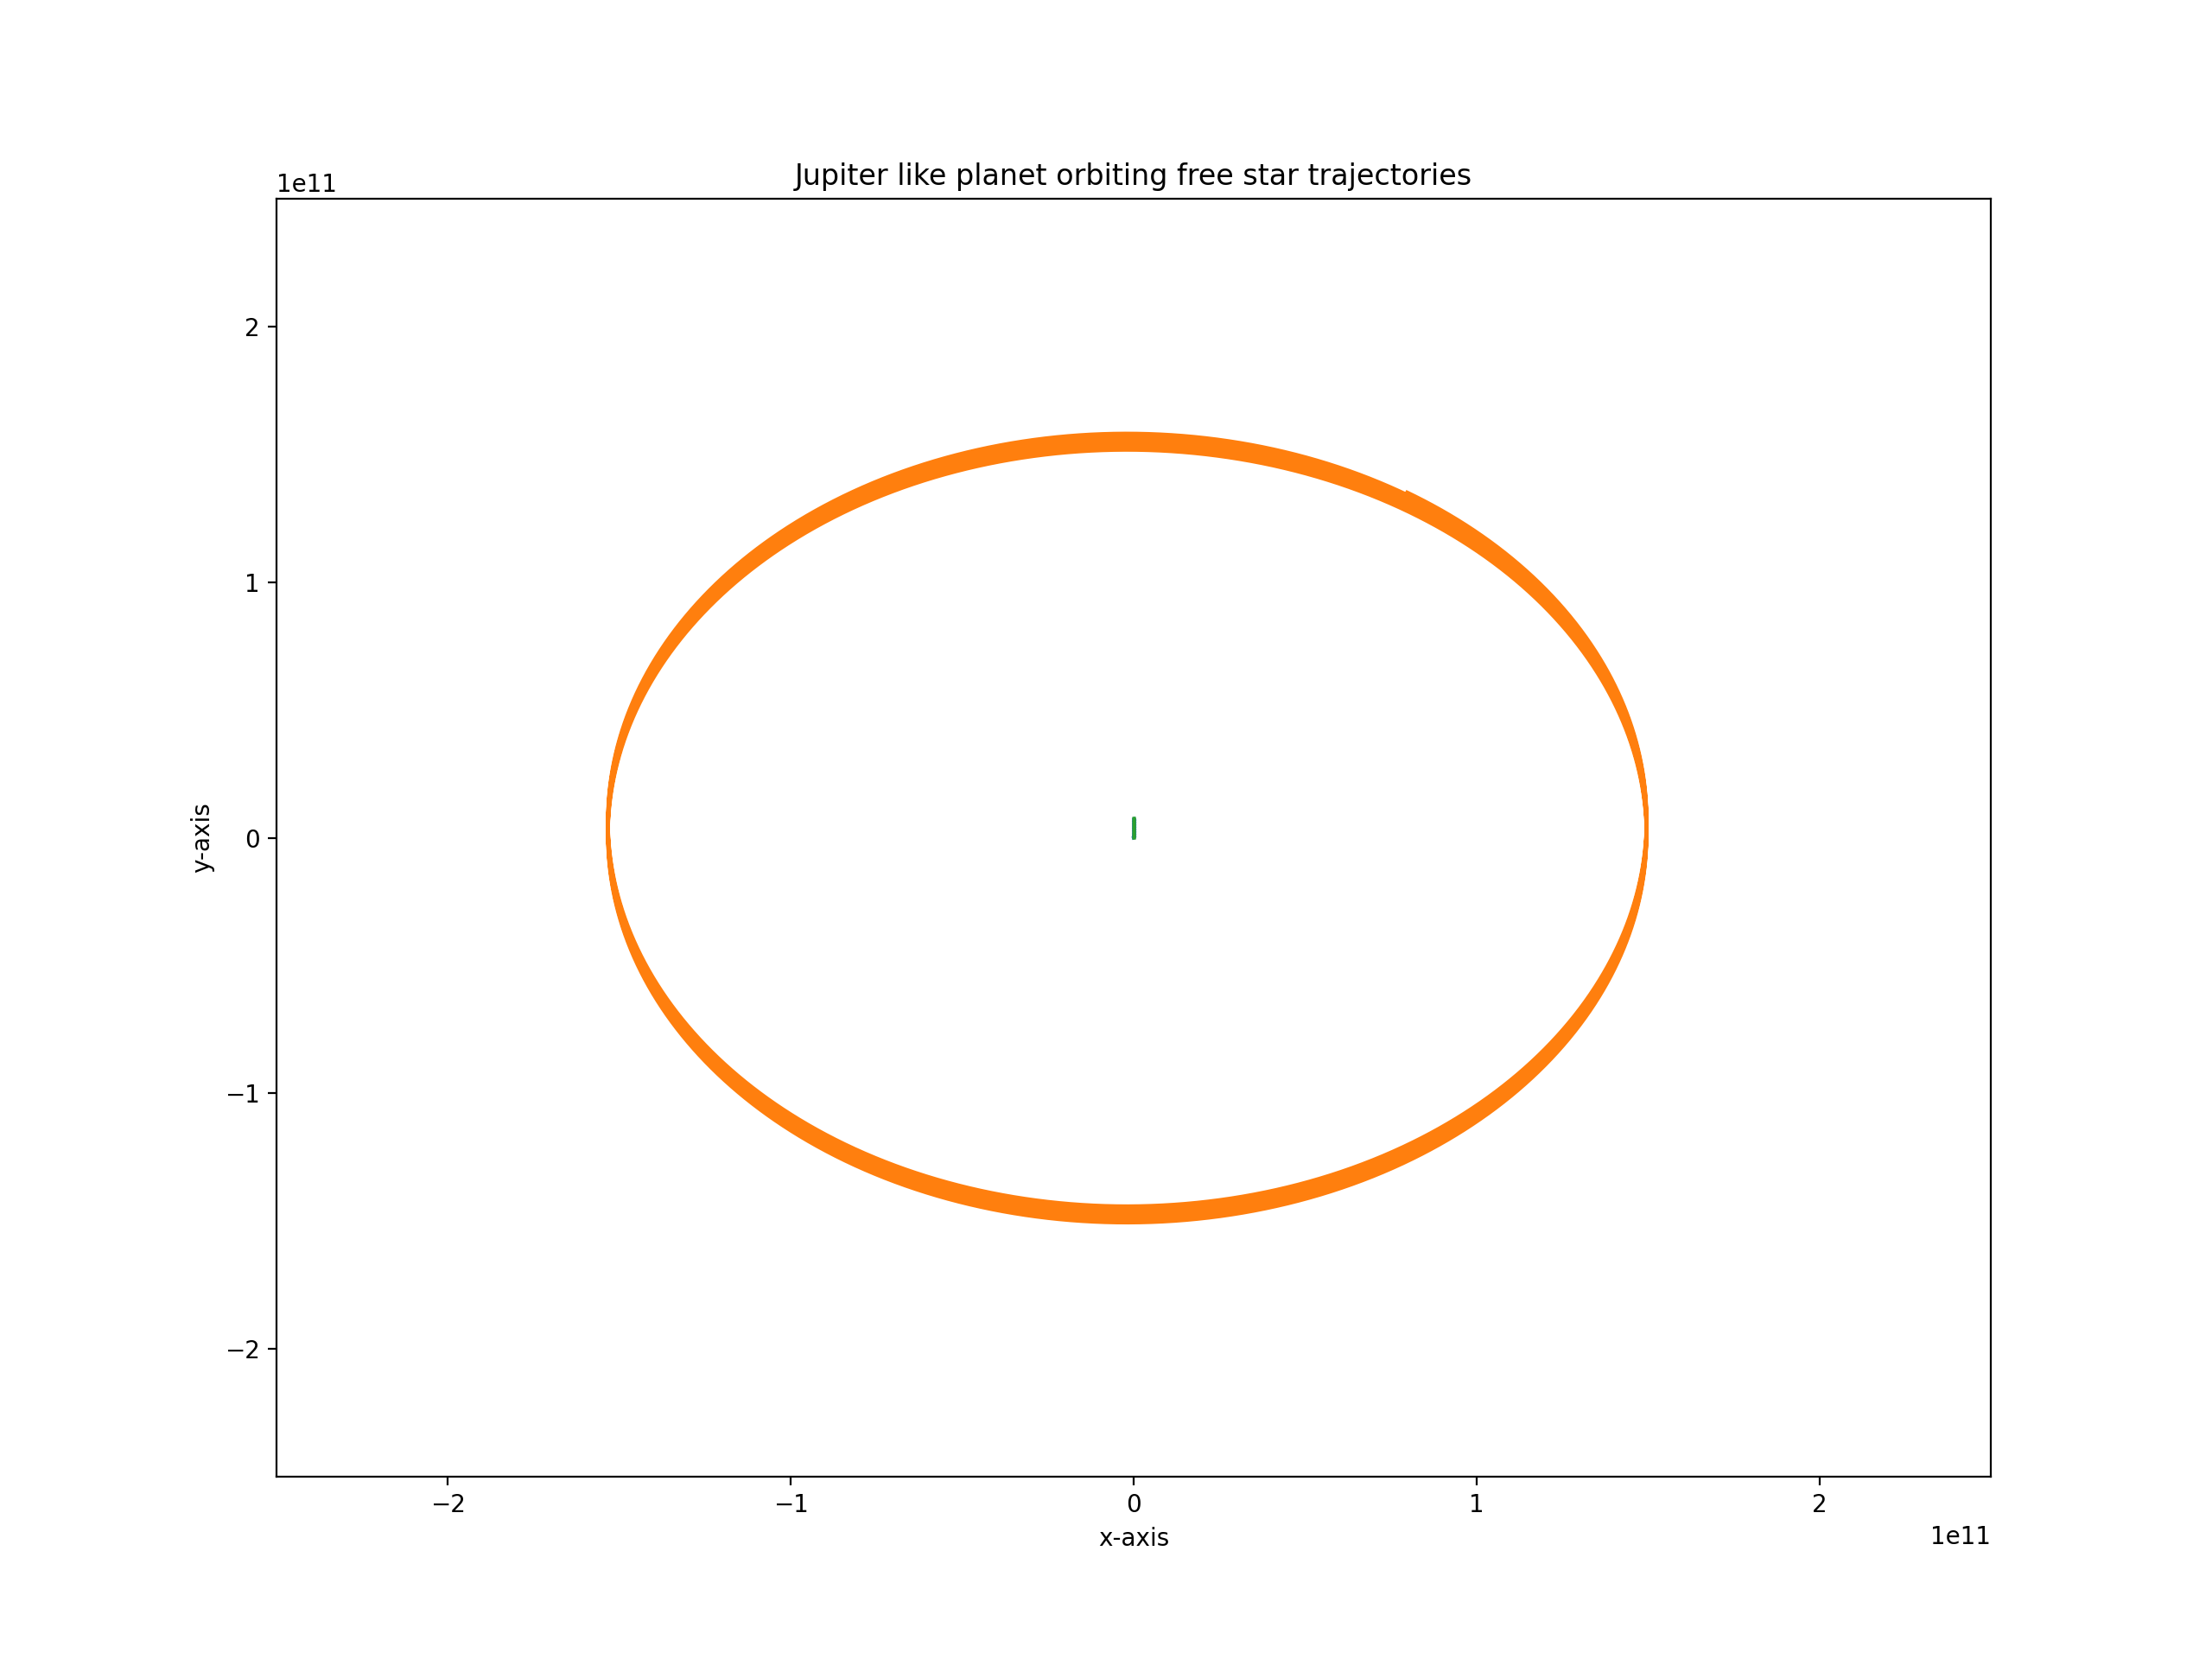

In [43]:
numberOfIterations = 30000 #appropriately long to see how changes with time
pointsDictionary = relativeTwoOrbit((0,0), (0,0), (jupiterOrbitDistance, 0),(0, vValue),sunMass,jupMass)
dim = 2.5e11

#set up figure
fig = plt.figure()
ax = plt.axes(xlim=(-dim, dim), ylim=(-dim, dim))
 
for key in pointsDictionary:
    #ensuring that the right graphs are plotted
    if key in ['accBodyOne', 'vB1', 'accBodyTwo', 'vB2']:
        continue
    
    plt.plot(pointsDictionary[key][:, 0], pointsDictionary[key][:, 1], label=key)
    
plt.title('Jupiter like planet orbiting free star trajectories')
    
plt.xlabel("x-axis")
plt.ylabel("y-axis")
   
plt.show()

Clearly the above does not give us much of a view of how the Sun wobbles and how the centre of gravity changes. Below we zoom in and scale the orbit of the Jupiter like planet down. This allows us to get a full view of the dynamics. We also animate the current acceleration and velocity for both the Jupiter like planet and the Star.

Though keep in mind that the Jupiter like planet trajectory is scaled down so the star will feel a force that doesn't correspond to the position of the planet on the scaled down trajectory.

### Orbital Dynamics Close Up

In [44]:
numberOfIterations = 30000 

pointsDictionary = relativeTwoOrbit((0,0), (0,0), (jupiterOrbitDistance, 0),(0, vValue),sunMass,jupMass)

dim = 3e9

fig = plt.figure()
ax = plt.axes(xlim=(-dim, dim), ylim=(-dim, dim))

#scaling jupiter like planet orbit down so it and the star and cog can be visible on the same graph
pointsDictionary['Body 2'] = np.array([x / 250 for x in pointsDictionary['Body 2']])     
   
for key in pointsDictionary:
    
    if key in ['accBodyOne', 'vB1', 'accBodyTwo', 'vB2']:
        pass
    else:
        plt.plot(pointsDictionary[key][:, 0], pointsDictionary[key][:, 1], label=key)
    
#plotting our text in appropriate locations
plt.text(1.5/5*dim, 5/6*dim, 'Star')
        
accText1 = plt.text(1.5/5*dim, 4/6*dim, '', label='accBodyOne')    

vText1 = plt.text(1.5/5*dim, 3/6*dim, 'v', label='vB1')

plt.text(-6/7*dim, 5/6*dim, 'Jupiter-like')

accText2 = plt.text(-6/7*dim, 4/6*dim, '', label='accBodyTwo')    

vText2 = plt.text(-6/7*dim, 3/6*dim, 'v', label='vB2')

#setting up objects for animation

animatingPointsDictionary = {}

for key in pointsDictionary:
    
    if key == 'accBodyOne':
        animatingPointsDictionary[key] = accText1
    elif key == 'vB1':
        animatingPointsDictionary[key] = vText1
    elif key == 'accBodyTwo':
        animatingPointsDictionary[key] = accText2
    elif key =='vB2':
        animatingPointsDictionary[key] = vText2
    else:
        animatingPointsDictionary[key], = ax.plot(0, 0, marker="o")
  
point, = ax.plot(0,0, marker="o")

anim = animation.FuncAnimation(fig, animateMultipleWithText, init_func=initWithText,
                               interval=1, blit=True, frames=numberOfIterations, save_count=300)    
    
plt.title('Star and barycenter with scaled Jupiter-like orbit')
    
plt.xlabel("x-axis")
plt.ylabel("y-axis")
    
plt.show()

<IPython.core.display.Javascript object>

We now move to finding out more specifically about the star's orbit around the centre of mass. We simulate and graph the star's trajectory relative to the system centre of gravity.

In [23]:
numberOfIterations = 3670 *10 #checking stable for long periods

pointsDictionary = relativeTwoOrbit((0,0), (0,0), (jupiterOrbitDistance, 0),(0, vValue),sunMass,jupMass)

#creating an array of the star's orbit relative to the barrycentre
sunOrbitRelativeToBarry = np.array([x - y for (x, y) in zip(pointsDictionary['Body 1'], pointsDictionary['Centre of Gravity'])])     

In [45]:
dim = 2e8

fig = plt.figure()
ax = plt.axes(xlim=(-dim, dim), ylim=(-dim, dim))

point, = ax.plot(0,0, marker="o")

plt.plot([0,0],'ro')
plt.annotate("Barycenter",(0,0))

anim = animation.FuncAnimation(fig, animateBarry, init_func=init,
                               interval=1, blit=True, frames=3670*3, save_count=300)    
    
plt.plot(sunOrbitRelativeToBarry[:, 0], sunOrbitRelativeToBarry[:, 1])
    
plt.title('Star orbit relative to barycenter')
    
plt.xlabel("x-axis")
plt.ylabel("y-axis")
    
plt.show()

<IPython.core.display.Javascript object>

Even over the course of many orbits the orbit of the star around the centre of gravity is closed and consistant. This fact will be seen to be useful later. 

### Calculating minimum and maximum radius of star's orbit.

In [25]:
#essentially same logic as previously seen

index = 0
    
minDistanceIndex = 0
maxDistanceIndex = 0
    
minDistanceCoords = [sunOrbitRelativeToBarry[0][0], sunOrbitRelativeToBarry[0][1]] 
    
maxDistanceCoords = [sunOrbitRelativeToBarry[0][0], sunOrbitRelativeToBarry[0][1]] 
    
minDistance = sqrt((minDistanceCoords[0] ** 2) + (minDistanceCoords[1] ** 2))
    
maxDistance = minDistance

for point in sunOrbitRelativeToBarry:
        
    distance = sqrt((point[0]**2) + (point[1] **2))
        
    if distance > maxDistance:
        maxDistance = distance
        maxDistanceIndex = index
            
        maxDistanceCoords[0] = point[0]
        maxDistanceCoords[1] = point[1]
       
    if distance < minDistance:
            
        minDistance = distance
        minDistanceIndex = index
            
        minDistanceCoords[0] = point[0]
        minDistanceCoords[1] = point[1]
        
    index += 1
print(minDistance)
print(maxDistance)

142613354.8468473
146459498.91376814


We now see what we can learn about how the above concepts and analyses links to the detection of exoplanets. We also calculate the radial velocity wobble of the above system. 

### Detections and implications of wobbling Stars

When stars move away with respect to an observation point their colour shifts to the red end of the spectrum. When stars move closer with respect to an observation point, their colour shifts to the blue end of the spectrum. If a star is getting redder, then normal and then bluer again it implies that it is moving in eliptical/circular motion around some centre of gravity (or barycenter) with respect to an observation point. This is because the observed shift in colour of the star implies a radial velocity that is changing in approximately sinsuduial motion, and thus an approximately circular orbit. The displacement of a star around a centre of gravity implies that the Star is orbited by another body. The orbit distance of this body and its mass can be inferred from the radial velocity, the amplitude of its sinsuduial motion and period.  

Because calculus and geometry allows us to calculate the radial velocity of 

### Calculating Radial Velocity of a wobbling Star in the general case


We can paramatise a star's circular orbit by the following: 
$$x = r\cos(\lambda t), y = r\sin(\lambda t) $$
, with $r = orbital radius and \lambda = \frac{2\pi}{orbital period}.$ Because we are concerned with radial velocity we do not need to worry about paramtising the orbit with respect to its actual location in space. The radial velocity is directed straight at the point of observation by definition and thus identical with respect to any direction. 


Next, we can clearly see that: $$\dot{y} = r\lambda\cos(\lambda t) $$ 
and thus we have the tell tale sinsuduial motion.


### Radial velocity our inital system

From our calculations and graphs in the previous section we know that our Star has a period about the centre of gravity of: $$3670 \times dt \space seconds = 3670 \times \frac{3.1536 \times 10^{7}}{3600} seconds = (\approx 1.02 earth years)$$.

Whilst the orbit of the star around the centre of gravity is elliptical rather than exactly ciruclar, it is approximately circular: it has a minimum radius of $1.43 \times 10^{8}$ and a maximum radius of $1.46 \times 10^{8}$. So, we can treat the orbit's radius $r$ as being about the average of these distances: $1.45 \times 10^{8}$.

Therefore, we have that our Jupiter like planet has an approximate radial velocity with amplitude:

$$ r \times \lambda = 1.45 \times 10^{8} \times \frac{2\pi}{ 3670 \times \frac{3.1536 \times 10^{7}}{3600}} \approx 28.3 ms^{-1} \space (3 s.f.)$$
        
The change in the radial velocity is shown by the graph below:    





<IPython.core.display.Javascript object>


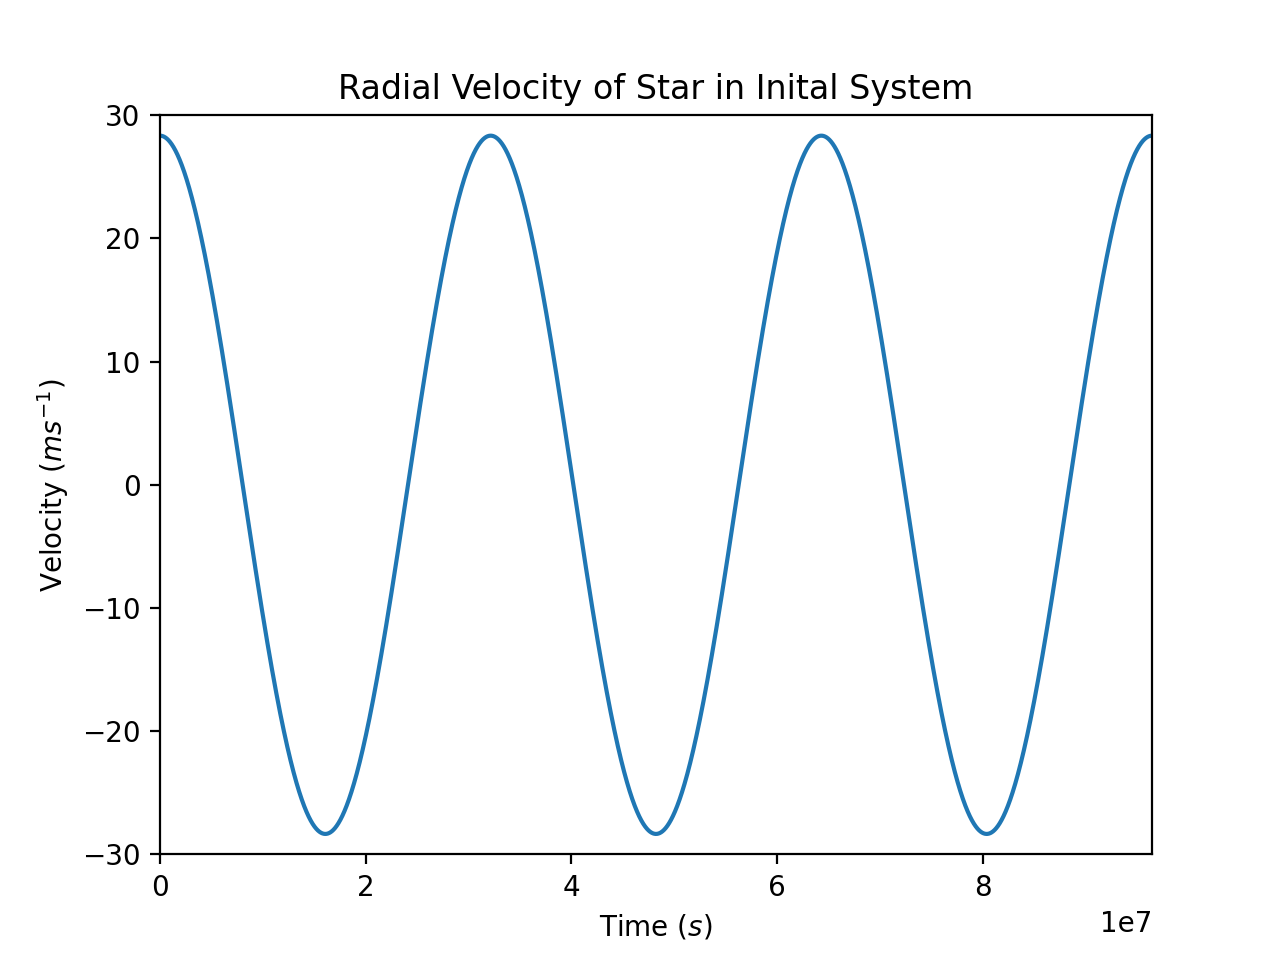

In [26]:
#necessary for our x array
roundedSeconds = int(round((3670 * (3.1536e7/3600)), 0)) * 3

fig = plt.figure()
ax = plt.axes(ylim=(-30, 30), xlim=(0, roundedSeconds))

#getting our x array
x = np.arange(0, roundedSeconds, 1)

#calculating lambda
lam = (2 * np.pi) / (3670 * (3.1536e7/3600))

#calculating y array
y = 1.45e8 * lam * np.cos(-lam * x)

plt.title('Radial Velocity of Star in Inital System')
    
plt.xlabel("Time ($s$)")
plt.ylabel("Velocity ($ms^{-1}$)")

plt.plot(x,y)

plt.show()

### Visbility of inital system radius velocity wobble from Earth.

The planet Gliese 581c was detected via the above method. It caused a $3.18m^{-1}$ variation in the radial velocity of the star it orbited. It is about $20$ light years away. Thus, a Jupiter like planet orbiting a star of mass similar to the Sun at a distance of $1AU$ should be detectable at 
$$\frac{28.3}{3.18} \times 20 \space light \space years \approx 178 \space light \space years.$$

# END